# Goal

Train a model using the fastai library and a Resnet152 model.

# Initialization


In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 1.2 MB 53.3 MB/s 
     |████████████████████████████████| 189 kB 71.5 MB/s 
     |████████████████████████████████| 56 kB 6.7 MB/s 
     |████████████████████████████████| 51 kB 401 kB/s 
Mounted at /content/gdrive


In [2]:
# Fastai
from fastai.vision.all import *
from fastbook import *
from fastai.vision.data import ImageDataLoaders

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas
import pandas as pd

# Pytorch
import torchvision

# Sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Parameters

In [3]:
# Training Parameters
VERSION = 'kkanjiHalf150_v7.3'
IMAGESIZE = 224
VALIDATION_SIZE = 0.3
RANDOM_STATE = 2018

model_name = 'resnet152'
model = getattr(torchvision.models, model_name)

# path definieren
path = Path('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/')

## Load Data

In [4]:
# Load Function
def load(f):
    return np.load(f, allow_pickle=True)['arr_0']

In [5]:
# Load the training data
x_train = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/07_kkanjiHalf150/kkanjiHalf150-train-imgs.npz')
y_train = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/07_kkanjiHalf150/kkanjiHalf150-train-labels.npz') 

In [6]:
# Load the test dataset
x_test = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/07_kkanjiHalf150/kkanjiHalf150-final-test-imgs.npz')
y_test = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/07_kkanjiHalf150/kkanjiHalf150-final-test-labels.npz') 

In [7]:
# Load a Kanji character map
char_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/kkanji_charmap_complete.csv', encoding = 'utf-8',sep=',')
char_df

,unicode,label,character,occurrence
0,U4E00,0,一,884
1,U4E91,1,云,883
2,U4E8B,2,事,837
3,U4EBA,3,人,787
4,U53C8,4,又,725
...,...,...,...,...
3012,U629B,3012,抛,1
3013,U6A61,3013,橡,1
3014,U98DC,3014,飜,1
3015,U6C08,3015,氈,1


## Data Exploration

In [ ]:
# Shape
print(f"train_image:\t{x_train.shape}")
print(f"train_label:\t{y_train.shape}" )
print(f"test_image:\t{x_test.shape}")
print(f"test_label:\t{y_test.shape}")

train_image:	(452550, 64, 64)
train_label:	(452550,)
test_image:	(84381, 64, 64)
test_label:	(84381,)


# DataBlock setup

In [8]:
# StratifiedShuffleSplit for the dataloaders object. This ensures that test and validation dataset include all Kanji characters

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

for train_index, test_index in sss.split(x_train, y_train):
    X_trainfin, X_testfin = x_train[train_index], x_train[test_index]
    y_trainfin, y_testfin = y_train[train_index], y_train[test_index]

In [9]:
# Code is based on http://nghiaho.com/?p=2741
def make_dataloaders_from_numpy_data(image, label):
    def pass_index(idx):
        return idx

    def get_x(i):
        return image[i]

    def get_y(i):
        return label[i] 

    dblock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=pass_index,
        splitter=IndexSplitter(test_index), # stratified split
        get_x=get_x,
        get_y=get_y,
        item_tfms = Resize(IMAGESIZE),
        batch_tfms=aug_transforms(do_flip=False, p_affine=1) 
        )

    # pass in a list of index
    num_images = image.shape[0]
    dls = dblock.dataloaders(list(range(num_images)))

    return dls

dls = make_dataloaders_from_numpy_data(x_train, y_train)

# Show batch
#dls.show_batch(cmap='gray')

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


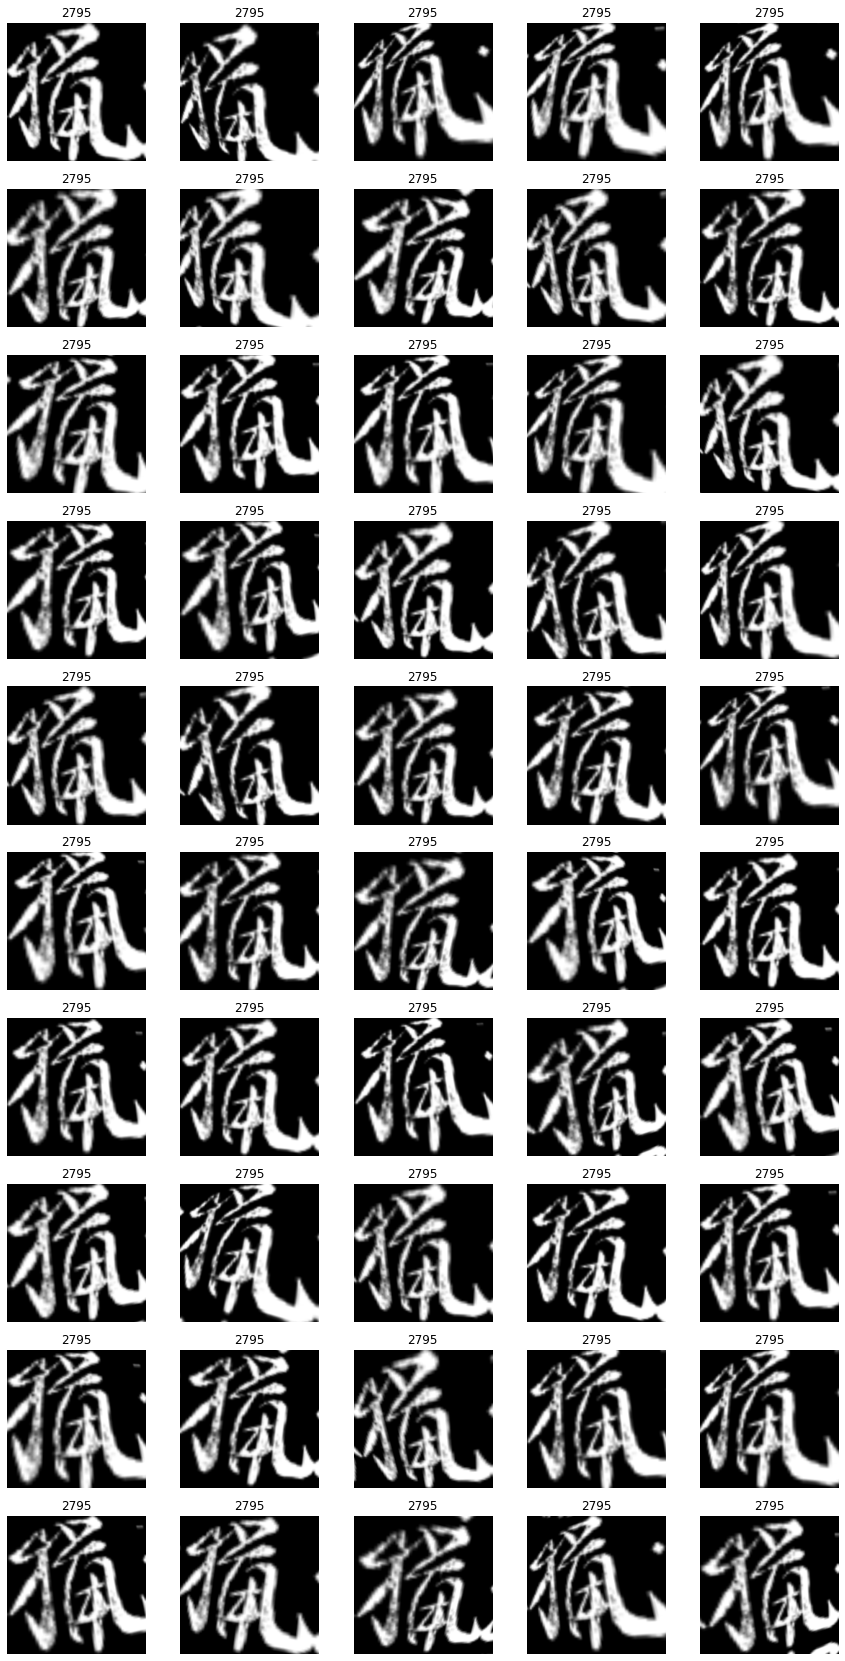

In [ ]:
# Display various versions of augmented transformed images
dls.train.show_batch(max_n=50, nrows=10, unique=True,cmap='gray')

# Model Training

In [ ]:
# Create a Learner object
learn = cnn_learner(dls, model, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

In [ ]:
# Train a model for 10 epochs
learn.fit_one_cycle(10, lr_max=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,1.454964,0.731484,0.169536,1:16:25
1,0.945967,0.341530,0.081884,1:16:21
2,0.645745,0.191350,0.044953,1:16:19
3,0.509663,0.130941,0.030928,1:16:20
4,0.370805,0.093903,0.022318,1:16:19
5,0.267872,0.065895,0.014488,1:16:19
6,0.182934,0.042069,0.009642,1:16:21
7,0.080110,0.023951,0.005259,1:16:28
8,0.049828,0.016271,0.003307,1:16:31
9,0.038813,0.015421,0.003108,1:16:26


In [ ]:
learn.save(str(path) + '/model/' + VERSION)

Path('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/model/kkanjiHalf150_v7.2.pth')

# Load an existing Model

In [10]:
learn = cnn_learner(dls, model, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

In [11]:
learn = learn.load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/model/kkanjiHalf150_v7.3')

# Validation

In [12]:
# Selection of the test dataset: x_test1 or x_test2
x_testdataset = x_test
y_testdataset = y_test

In [13]:
# Prediction of the test dataset
test_dl = dls.test_dl(x_testdataset)
preds = learn.get_preds(dl=test_dl,with_decoded=True)
pred = preds[0].argmax(dim=-1) #  to get the actual predicted classes
pred_np = to_np(pred) # Transform tensor to ndarray

In [ ]:
np.save('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/model/pred_np_test.npy',pred_np)

### Helper Function to display the results

In [ ]:
# Helper function to display the results

def display_results(analysis,y_true, y_pred,counter):
  print(f"F1 \tAccuracy\tExample\tUnique\t\tOccurrence")
  print(f"Score\t\t\tCount\tCharacters \tRange")
  print(f'{"="*58}')

  count = 0
  Kanjicount = 0
  lineCheck = true

  for item in range(len(counter) - 1):
    if item == 0:
      # Case 1
      df = analysis[analysis['occurrence'] <= counter[item]]
      count = count + df.count()[0]
      y_pred = df['prediction']
      y_true = df['label']
      Kanjicount = Kanjicount + len(np.unique(y_true))
      print(f"{round(f1_score(y_true, y_pred, average='weighted'),4)}\t {round(accuracy_score(y_true, y_pred),4)}\t\t{df.count()[0]:>5} \t{len(np.unique(y_true)):>5} \t\t 1-{counter[item]} ")

      # Case 2
      df = analysis[(analysis['occurrence'] > counter[item]) & (analysis['occurrence'] <= counter[item + 1])]
      count = count + df.count()[0]
      y_pred = df['prediction']
      y_true = df['label']
      Kanjicount = Kanjicount + len(np.unique(y_true))
      print(f"{round(f1_score(y_true, y_pred, average='weighted'),4)}\t {round(accuracy_score(y_true, y_pred),4)}\t\t{df.count()[0]:>5} \t{len(np.unique(y_true)):>5} \t\t {counter[item] + 1}-{counter[item + 1]} ")
    else:
      df = analysis[(analysis['occurrence'] > counter[item]) & (analysis['occurrence'] <= counter[item + 1])]
      count = count + df.count()[0]
      y_pred = df['prediction']
      y_true = df['label']
      Kanjicount = Kanjicount + len(np.unique(y_true))
      if (f1_score(y_true, y_pred, average='weighted') >= 0.9) and lineCheck:
        lineCheck = False
        print(f'{"-"*58}')
      print(f"{round(f1_score(y_true, y_pred, average='weighted'),4)}\t {round(accuracy_score(y_true, y_pred),4)}\t\t{df.count()[0]:>5} \t{len(np.unique(y_true)):>5} \t\t {counter[item] + 1}-{counter[item + 1] } ")

  # Overall analysis
  y_pred = analysis['prediction'].values
  y_true = analysis['label'].values

  # Correct and incorrect predictions
  correct = np.nonzero(y_pred==y_true)[0]
  incorrect = np.nonzero(y_pred!=y_true)[0]

  print(f'{"="*58}\n')
  print(f"Correct Count:  \t{correct.shape[0] :>5}")
  print(f"Incorrect Count: \t{incorrect.shape[0] :>5}")
  print(f'{"-"*30}')
  print(f"Total Count:\t\t{count :>5}\n")
  print(f"Unique Kanji Count:\t{Kanjicount :>5}\n")
  print(f"Overall F1-Score:{round(f1_score(y_true, y_pred, average='weighted'),4):>12}")
  print(f"Overall Accuracy:{round(accuracy_score(y_true, y_pred),4):>12}")

## Analysis

In [ ]:
countRange = [1,5,10,20,30,40,50,100,150,500,1000]
display_results(analysis,y_testdataset, pred_np, countRange)

F1 	Accuracy 	Example	Unique		Occurrence
Score			Count	Characters 	Range
0.5207	 0.5231		  411 	  411 		 1-1 
0.7897	 0.7523		 2725 	 1115 		 2-5 
----------------------------------------------------------
0.9102	 0.8649		 3722 	  477 		 6-10 
0.944	 0.9141		 5518 	  359 		 11-20 
0.9545	 0.9291		 4652 	  182 		 21-30 
0.9671	 0.9449		 3576 	   99 		 31-40 
0.979	 0.9598		 3008 	   66 		 41-50 
0.9743	 0.956		11254 	  162 		 51-100 
0.9674	 0.9486		 6366 	   53 		 101-150 
0.9776	 0.965		28114 	   80 		 151-500 
0.98	 0.9648		15035 	   13 		 501-1000 

Correct Count:  	79551
Incorrect Count: 	 4830
------------------------------
Total Count:		84381

Unique Kanji Count:	 3017

Overall F1-Score:      0.9416
Overall Accuracy:      0.9428


In [ ]:
countRange = [10,150,2000]
display_results(analysis,y_testdataset, pred_np, countRange)

F1 	Accuracy 	Example	Unique		Occurrence
Score			Count	Characters 	Range
0.821	 0.7997		 6858 	 2003 		 1-10 
0.9525	 0.9434		34374 	  921 		 11-150 
----------------------------------------------------------
0.9765	 0.965		43149 	   93 		 151-2000 

Correct Count:  	79551
Incorrect Count: 	 4830
------------------------------
Total Count:		84381

Unique Kanji Count:	 3017

Overall F1-Score:      0.9416
Overall Accuracy:      0.9428


## Incorrectly predicted Kanji characters

In [14]:
# Change Font Properties to display Japanese characters
import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Fonts/fonts/YujiSyuku-Regular.ttf')

In [15]:
# Helper function to get argmax from every prediction row
probability_list = []

def get_argmax(predictions):
  for counter in range(0,len(predictions[0])):
    test = np.argmax(predictions[0][counter])
    #print(f"Index: {np.argmax(predictions[0][counter])}, Probability: {round(predictions[0][counter][test].item(),4)}")
    probability_list.append(round(predictions[0][counter][test].item(),2))

In [16]:
# Get probability from every prediction
get_argmax(preds)
probability_list = np.array(probability_list)

In [17]:
# Randomly select 50 incorrectly predicted Kanji characters
incorrect = np.where(pred_np != y_testdataset)[0]
incorrect_sample = np.random.choice(incorrect, 50, replace=False)

In [18]:
# Create dataset via the indices
x_figure = x_testdataset[incorrect_sample]
y_figure = y_testdataset[incorrect_sample]
prediction = pred_np[incorrect_sample]
probability = probability_list[incorrect_sample]

In [33]:
# Helper function to display Kanji and label
def display_images (x_figure,y_figure, prediction, probability):
  image_views = len(y_figure)
  columns = 10
  rows = np.ceil(image_views / columns)
  for counter in range(0,image_views):
    plt.subplot(rows,columns,counter + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel('A:' + str(char_df.iloc[y_figure[counter],3]) + ' P:' + str(char_df.iloc[prediction[counter],3]) + 'Pr:' + str(probability[counter]),fontproperties=fprop,fontsize=12)
    plt.imshow(x_figure[counter],cmap=plt.cm.binary)

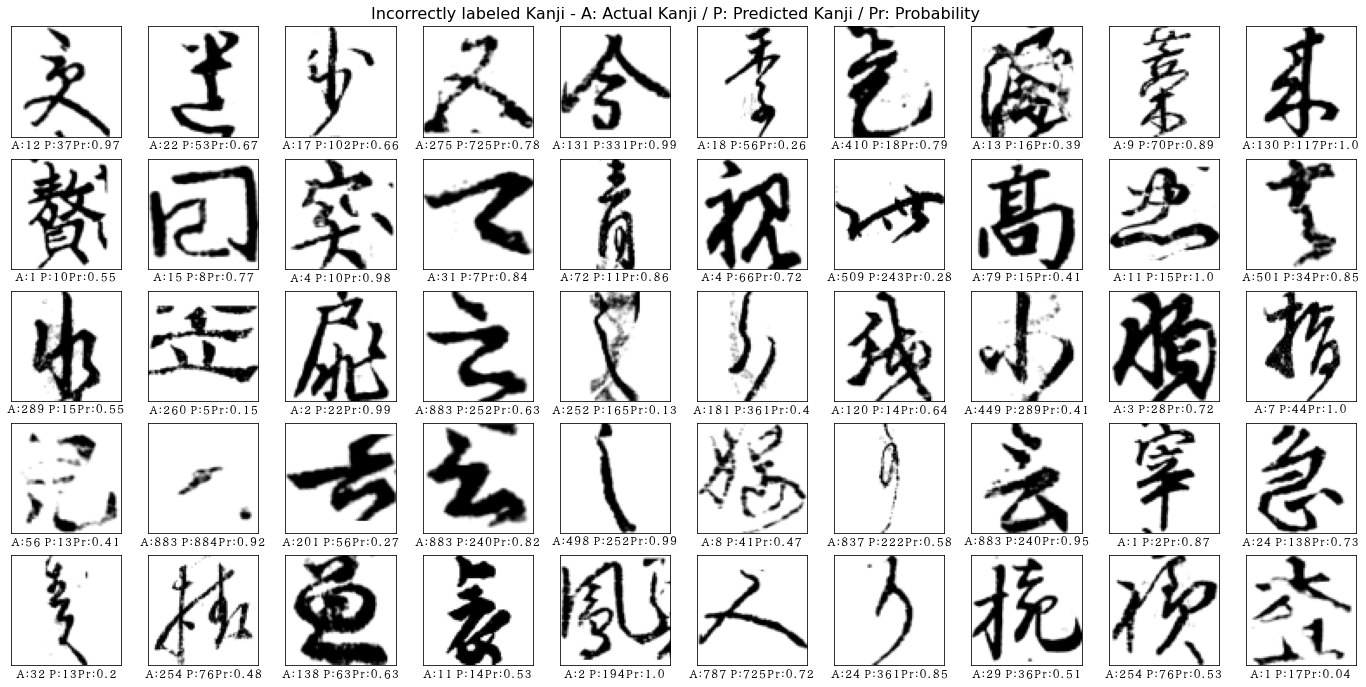

In [35]:
# Display Kanji characters
figure, _ = plt.subplots(figsize=(20,10))
figure.suptitle('Incorrectly labeled Kanji - A: Actual Kanji / P: Predicted Kanji / Pr: Probability', fontsize=16)
figure.tight_layout(pad=3.0)
display_images(x_figure,y_figure,prediction, probability)